In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator, image
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


In [2]:
#load the csv file which contains the images and labels
df = pd.read_csv('BizlersTechnologiesHiringChallenge2019/Train/train.txt')
df.tail()
!pwd

/home/deepak/Desktop


In [3]:
names = []
labels = []
with open('BizlersTechnologiesHiringChallenge2019/Train/train.txt', 'r') as f:
    for line in f.readlines():
        tokens = line.split(",")
        name = tokens[0]
        s = tokens[5]
        label = s.replace("\n", "")
        if(label == 'A'):
            name_ = name.replace("jpg",".jpg")
            names.append(name_)
            labels.append(0)
        elif (label == 'B'):
            names.append(name)
            labels.append(1)
        elif (label == 'C'):
            names.append(name)
            labels.append(2)
        elif (label == 'D'):
            names.append(name)
            labels.append(3)
            
#convert the files into pandas data frame after reading it in the form of filename, category     
data = pd.DataFrame({
    'filename': names,
    'category': labels
})



In [4]:
print(data)


            filename  category
0     A/pic_0011.jpg         0
1     A/pic_0012.jpg         0
2     A/pic_0013.jpg         0
3     A/pic_0014.jpg         0
4     A/pic_0015.jpg         0
5     A/pic_0016.jpg         0
6     A/pic_0017.jpg         0
7     A/pic_0019.jpg         0
8     A/pic_0020.jpg         0
9     A/pic_0021.jpg         0
10    A/pic_0022.jpg         0
11    A/pic_0023.jpg         0
12    A/pic_0024.jpg         0
13    A/pic_0025.jpg         0
14    A/pic_0026.jpg         0
15    A/pic_0027.jpg         0
16    A/pic_0028.jpg         0
17    A/pic_0029.jpg         0
18    A/pic_0030.jpg         0
19    A/pic_0031.jpg         0
20    A/pic_0032.jpg         0
21    A/pic_0033.jpg         0
22    A/pic_0034.jpg         0
23    A/pic_0035.jpg         0
24    A/pic_0036.jpg         0
25    A/pic_0037.jpg         0
26    A/pic_0038.jpg         0
27    A/pic_0039.jpg         0
28    A/pic_0040.jpg         0
29    A/pic_0041.jpg         0
...              ...       ...
1310  D/

In [5]:
#load all the images from the train directory and convert it into corresponding form in vector
#apply the feature normalization after dividing it by 255, to convert all image in form RGB

train_image = []
X = []
for i in tqdm(range(df.shape[0] + 1)):
    if(i <= 584):
        img = image.load_img("BizlersTechnologiesHiringChallenge2019/Train/" + data['filename'][i],target_size = (200, 200, 1), grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    elif( i > 584 and i <= 687):
        img = image.load_img('BizlersTechnologiesHiringChallenge2019/Train/'+ data['filename'][i],target_size = (200, 200, 1),  grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    elif((i > 687) and (i <= 1235)):
        img = image.load_img('BizlersTechnologiesHiringChallenge2019/Train/' + data['filename'][i],target_size = (200, 200, 1), grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    elif(i > 1235):
        img = image.load_img('BizlersTechnologiesHiringChallenge2019/Train/'+ data['filename'][i],target_size = (200, 200, 1), grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        
    
X = np.array(train_image)

  0%|          | 0/1340 [00:00<?, ?it/s]/home/deepak/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 1340/1340 [00:08<00:00, 163.72it/s]


(1340, 200, 200, 1)


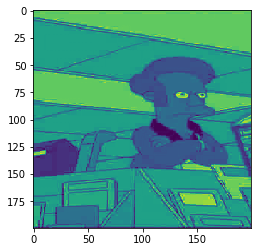

In [6]:
print(X.shape)
g = plt.imshow(X[1339][:,:,0])

In [7]:
#count the images of different classes
data['category'].value_counts()

0    584
2    548
3    105
1    103
Name: category, dtype: int64

In [8]:
y = data['category'].values
print(y)
print(y.shape)

[0 0 0 ... 3 3 3]
(1340,)


In [9]:
#encode the labels to one hot code vectors
y = to_categorical(y)

In [10]:
# split the train into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

In [11]:
print(X_train.shape)
print(X_val.shape)

(1072, 200, 200, 1)
(268, 200, 200, 1)


In [12]:
#define the model with four layers
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (200,200,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

#apply data augmentation to the image in order to increase the number of training images
datagen = ImageDataGenerator(
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True, 
        fill_mode = 'nearest',
        vertical_flip=False)  


datagen.fit(X_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
#set the optimizer as rmsprop with learning rate 0.0001
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer = opt,metrics=['accuracy'])

In [14]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size = 8),
                              epochs = 30, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 8)
model.save_weights('model_4layers.h5')


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 493s - loss: 1.1399 - acc: 0.4403 - val_loss: 1.1721 - val_acc: 0.4515
Epoch 2/30
 - 494s - loss: 1.1012 - acc: 0.4618 - val_loss: 1.1530 - val_acc: 0.4739
Epoch 3/30
 - 473s - loss: 1.0797 - acc: 0.4916 - val_loss: 1.1399 - val_acc: 0.5448
Epoch 4/30
 - 481s - loss: 1.0649 - acc: 0.5159 - val_loss: 1.2027 - val_acc: 0.4963
Epoch 5/30
 - 479s - loss: 1.0642 - acc: 0.5392 - val_loss: 1.1185 - val_acc: 0.6119
Epoch 6/30
 - 484s - loss: 1.0252 - acc: 0.5728 - val_loss: 1.1503 - val_acc: 0.6157
Epoch 7/30
 - 481s - loss: 1.0287 - acc: 0.5802 - val_loss: 1.0145 - val_acc: 0.6493
Epoch 8/30
 - 515s - loss: 1.0081 - acc: 0.5802 - val_loss: 1.0898 - val_acc: 0.4963
Epoch 9/30
 - 487s - loss: 0.9961 - acc: 0.5812 - val_loss: 0.9240 - val_acc: 0.6604
Epoch 10/30
 - 495s - loss: 0.9564 - acc: 0.6278 - val_loss: 1.0678 - val_acc: 0.6269
Epoch 11/30
 - 456s - loss: 0.9592 - acc: 0.6194 - val_loss: 1.0045 - val_acc: 0.6604
Epoch 12/30
 - 

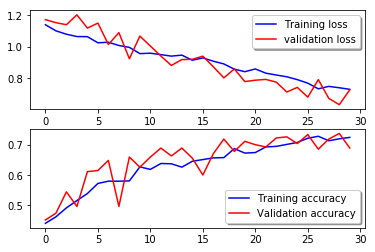

In [23]:
#display the plot of the training and validation set accuracy and loss
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

/home/deepak/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


                                             filename labels
0   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
1   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
2   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
3   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
4   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
5   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
6   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
7   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
8   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
9   BizlersTechnologiesHiringChallenge2019/Test/t1...      A
10  BizlersTechnologiesHiringChallenge2019/Test/t1...      A
The predicted class is
A


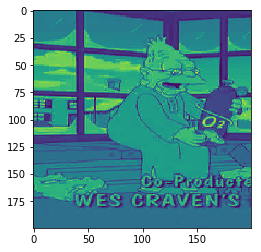

In [132]:
import glob
#read all the images from the test/t1 folder
filenames = [img for img in glob.glob("BizlersTechnologiesHiringChallenge2019/Test/t1/*.jpg")]
filenames.sort()
classes = []
for img in filenames:
    image_name.append(img)
    img_ = image.load_img(img, target_size = (200, 200,1), grayscale = True)
    img_ = image.img_to_array(img_)
    img_ = img_/255
    classes.append(img_)
    
test1 = np.array(classes)
#predict results
results = model.predict(test1)
#select the index with maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
for i in range(len(results)):
    if(results[i] == 0):
        results[i] = 'A'
    elif (results[i] == 1):
        results[i] = 'B'
    elif (results[i] == 2):
        results[i] = 'C'
    else:
        results[i] = 'D'
        
#convert the results and filename into pandas data frame
t1 = pd.DataFrame({
    'filename': filenames,
    'labels': results
})
print(t1)


g = plt.imshow(test1[4][:,:,0])
print("The predicted class is")
print(results[4])


/home/deepak/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


                                             filename labels
0   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
1   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
2   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
3   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
4   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
5   BizlersTechnologiesHiringChallenge2019/Test/t2...      C
6   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
7   BizlersTechnologiesHiringChallenge2019/Test/t2...      B
8   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
9   BizlersTechnologiesHiringChallenge2019/Test/t2...      A
10  BizlersTechnologiesHiringChallenge2019/Test/t2...      A
The predicted class is
A


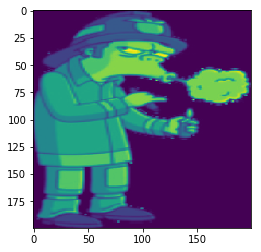

In [133]:
import glob
#read all the images from the test/t2 folder
filenames = [img for img in glob.glob("BizlersTechnologiesHiringChallenge2019/Test/t2/*.jpg")]
filenames.sort()
classes = []
for img in filenames:
    img_ = image.load_img(img, target_size = (200, 200,1), grayscale = True)
    img_ = image.img_to_array(img_)
    img_ = img_/255
    classes.append(img_)
    
test2 = np.array(classes)
#predict results
results = model.predict(test2)
#select the index with maximum probaility
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
for i in range(len(results)):
    if(results[i] == 0):
        results[i] = 'A'
    elif (results[i] == 1):
        results[i] = 'B'
    elif (results[i] == 2):
        results[i] = 'C'
    else:
        results[i] = 'D'

#convert the results and filename into pandas data frame
t2 = pd.DataFrame({
    'filename': filenames,
    'labels': results
})
print(t2)
g = plt.imshow(test2[1][:,:,0])
print("The predicted class is")
print(results[1])


/home/deepak/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


                                             filename labels
0   BizlersTechnologiesHiringChallenge2019/Test/t3...      D
1   BizlersTechnologiesHiringChallenge2019/Test/t3...      C
2   BizlersTechnologiesHiringChallenge2019/Test/t3...      D
3   BizlersTechnologiesHiringChallenge2019/Test/t3...      C
4   BizlersTechnologiesHiringChallenge2019/Test/t3...      C
5   BizlersTechnologiesHiringChallenge2019/Test/t3...      C
6   BizlersTechnologiesHiringChallenge2019/Test/t3...      D
7   BizlersTechnologiesHiringChallenge2019/Test/t3...      D
8   BizlersTechnologiesHiringChallenge2019/Test/t3...      D
9   BizlersTechnologiesHiringChallenge2019/Test/t3...      D
10  BizlersTechnologiesHiringChallenge2019/Test/t3...      C
The predicted class is
C


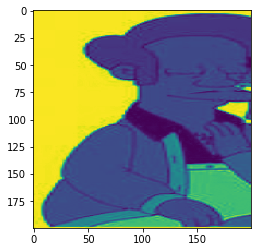

In [134]:
import glob
# read all the images from test/t3 folder
filenames = [img for img in glob.glob("BizlersTechnologiesHiringChallenge2019/Test/t3/*.jpg")]
filenames.sort()
classes = []
for img in filenames:
    img_ = image.load_img(img, target_size = (200, 200,1), grayscale = True)
    img_ = image.img_to_array(img_)
    img_ = img_/255
    classes.append(img_)
    
test3 = np.array(classes)
#predict results
results = model.predict(test3)
#select the index with maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
for i in range(len(results)):
    if(results[i] == 0):
        results[i] = 'A'
    elif (results[i] == 1):
        results[i] = 'B'
    elif (results[i] == 2):
        results[i] = 'C'
    else:
        results[i] = 'D'
        
#convert the results and filename into pandas data frame        
t3 = pd.DataFrame({
    'filename': filenames,
    'labels': results
})
print(t3)

g = plt.imshow(test3[4][:,:,0])
print("The predicted class is")
print(results[4])


/home/deepak/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


                                             filename labels
0   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
1   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
2   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
3   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
4   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
5   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
6   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
7   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
8   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
9   BizlersTechnologiesHiringChallenge2019/Test/t4...      C
10  BizlersTechnologiesHiringChallenge2019/Test/t4...      C
The predicted class is
C


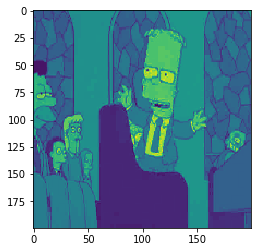

In [135]:
import glob
# read all the images from test/t3 folder
filenames = [img for img in glob.glob("BizlersTechnologiesHiringChallenge2019/Test/t4/*.jpg")]
filenames.sort()
classes = []
for img in filenames:
    img_ = image.load_img(img, target_size = (200, 200,1), grayscale = True)
    img_ = image.img_to_array(img_)
    img_ = img_/255
    classes.append(img_)
    
test4 = np.array(classes)
#predict results
results = model.predict(test4)
#select the index with maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
for i in range(len(results)):
    if(results[i] == 0):
        results[i] = 'A'
    elif (results[i] == 1):
        results[i] = 'B'
    elif (results[i] == 2):
        results[i] = 'C'
    else:
        results[i] = 'D'
        
#convert the results and filename into pandas data frame  
t4 = pd.DataFrame({
    'filename': filenames,
    'labels': results
})
print(t4)
g = plt.imshow(test4[4][:,:,0])
print("The predicted class is")
print(results[4])